In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorboard import notebook
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt 
%matplotlib inline

In [6]:
from gensim.models import Word2Vec
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, Embedding, LSTM, Bidirectional, GRU, GlobalMaxPool1D
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Model
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
import pydot
import IPython
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model


In [7]:
import seaborn as sns

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [9]:
train = pd.read_csv('train.csv')
#test = pd.read_csv('./test.csv')


In [10]:
label_count = train[train.columns[2:]].sum()
label_count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [11]:
# marking comments without any tags as "clean"
tag_sums = train.iloc[:,2:].sum(axis=1)
train['clean'] = (tag_sums==0)

In [6]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
train_y = train[list_classes].values
train_x= train["comment_text"]


In [12]:
label_count = train[train.columns[2:]].sum()
label_count

toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
clean            143346
dtype: int64

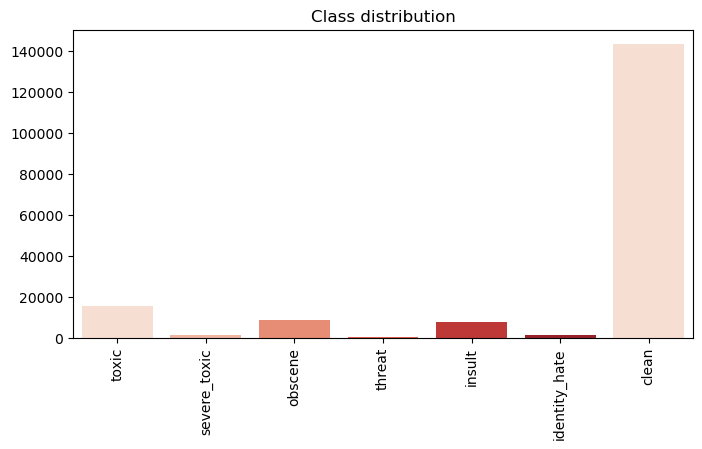

In [13]:
plt.figure(figsize=(8,4))
sns.barplot(x= label_count.index, y = label_count.values, palette= sns.color_palette("Reds"))
plt.xticks(rotation=90)
plt.title('Class distribution', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Distribution of comment Lengths')

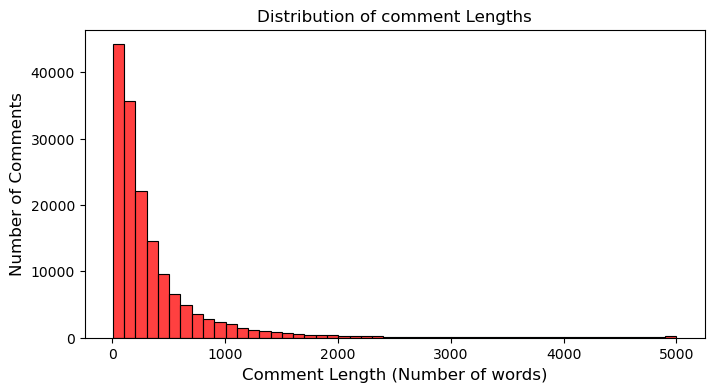

In [14]:
comment_len = train.comment_text.str.len()

# plot the distribution of comment lengths
plt.figure(figsize=(8,4))
sns.histplot(comment_len, kde=False, bins=50, color="red")
plt.xlabel("Comment Length (Number of words)", fontsize=12)
plt.ylabel("Number of Comments", fontsize=12)
plt.title("Distribution of comment Lengths", fontsize=12)

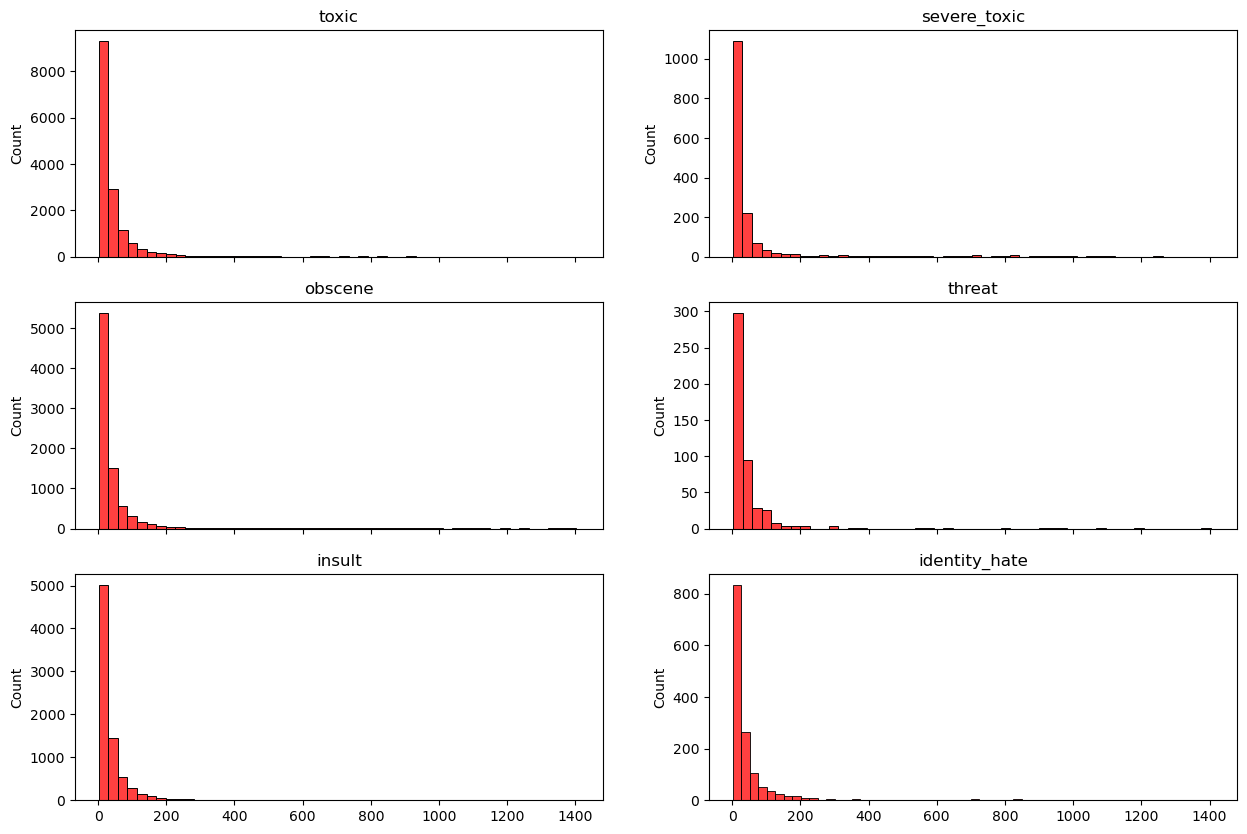

In [15]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,10), sharex=True)
axes =ax.ravel()

for i in range(6):
    comments = train.loc[train[labels[i]] == 1, :]
    comment_len = [len(comment.split()) for comment in comments["comment_text"]]
    sns.histplot(comment_len, ax=axes[i], bins = 50, color="red")
    axes[i].title.set_text(labels[i])

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud ,STOPWORDS
from collections import Counter

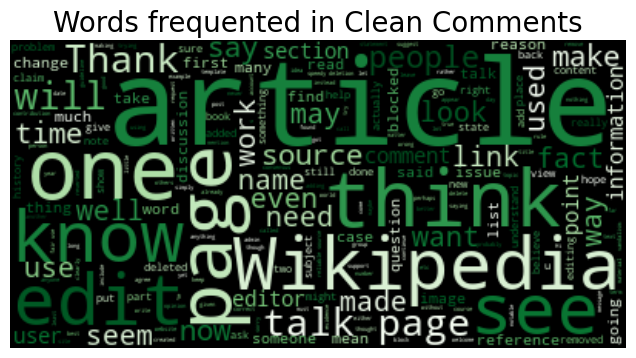

In [19]:
# clean words
subset=train[train.clean==True]
text = " ".join(i for i in subset.comment_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, colormap="Greens").generate(text)
plt.figure( figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Words frequented in Clean Comments", fontsize=20)
plt.show()


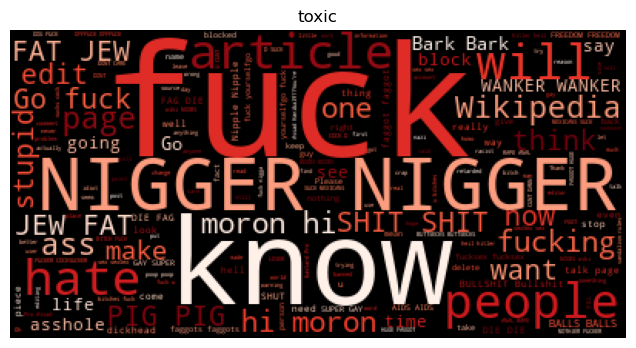

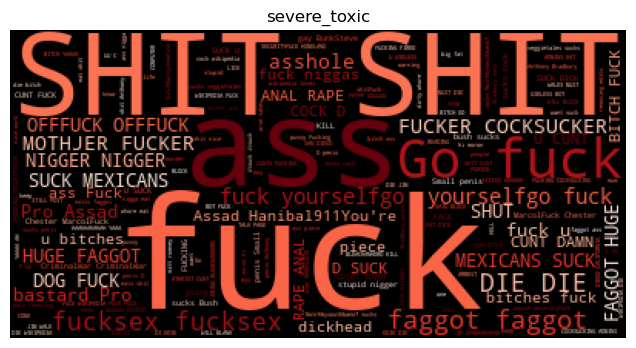

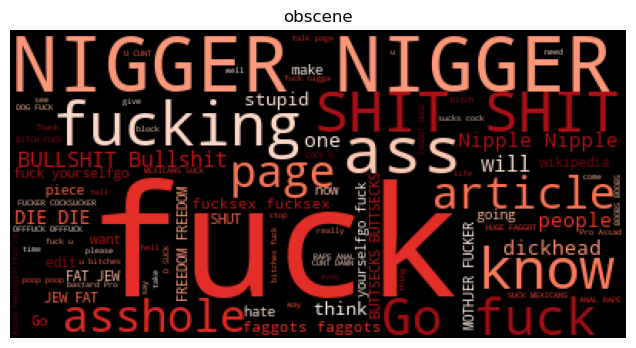

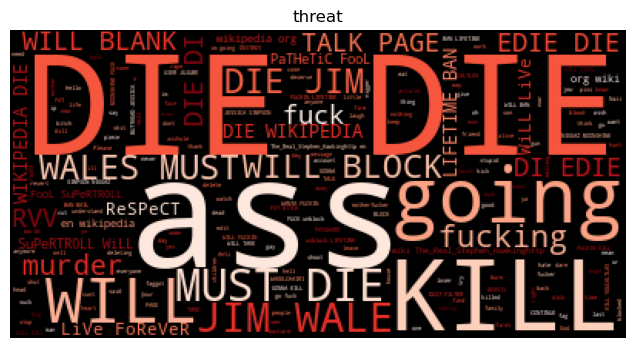

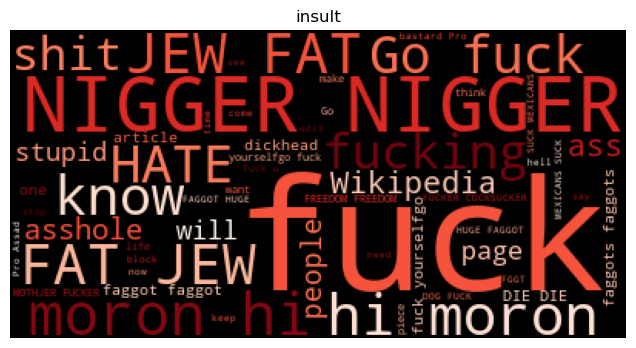

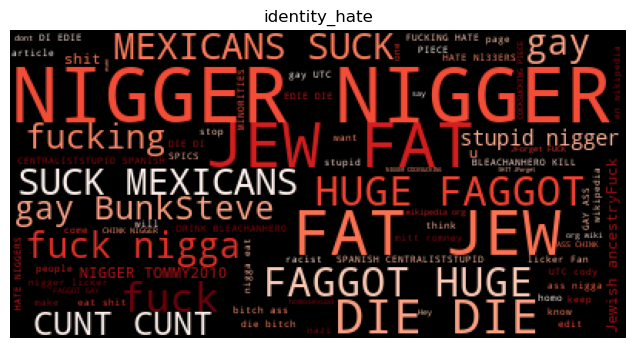

In [20]:
stopwords = set(STOPWORDS)

for l in labels:
    subset = train[train[l]==1]
    text = " ".join(i for i in subset.comment_text)
    wordcloud = WordCloud(
        stopwords=stopwords,
        max_words=200,
        max_font_size=100, 
        colormap="Reds"
        ).generate(text)

    fig = plt.figure(figsize=(8, 4))
    plt.title(l)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()